#Group Members : Raj Kumar

#Problem Formulation 
#####We've been given 79 variables that influence the price of houses in Ames, Iowa. A higher price is understood as highly desirable by potential buyers. Many of these variables however are not traditional ones thought of by buyers such as proximity to an east-west railroad. 
#####The objective of the problem I have formulated is to identify the variables that contribute most to the final price of a house as well as predicting the final price given the variables.

#Data Population 
#####I am using the Ames Housing dataset compiled by Dean De Cock which contains these 79 explanatory variables along with the final price (our target variable).
#####The data population is the houses whose prices are to be predicted. The sample we have been given is not the same but is historic information of houses sold in the past. But we may be able to say that it is representative assuming no factors have changed between the time the data was collected and the time we are predicting the prices of the houses.

#Account Name : bayesgod

#Loading Data

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import os
os.chdir('/content/drive/MyDrive/house-prices-advanced-regression-techniques')

In [84]:
!ls

data_description.txt  sample_submission.csv  train.csv
first_submission.png  second_submission.png  xgbr_vanilla.csv
lin_reg_vanilla.csv   test.csv


#Description of data

In [85]:
#text file explaining the meaning of the variables in the data
with open('data_description.txt') as f:
    lines = f.readlines()
lines

['MSSubClass: Identifies the type of dwelling involved in the sale.\t\n',
 '\n',
 '        20\t1-STORY 1946 & NEWER ALL STYLES\n',
 '        30\t1-STORY 1945 & OLDER\n',
 '        40\t1-STORY W/FINISHED ATTIC ALL AGES\n',
 '        45\t1-1/2 STORY - UNFINISHED ALL AGES\n',
 '        50\t1-1/2 STORY FINISHED ALL AGES\n',
 '        60\t2-STORY 1946 & NEWER\n',
 '        70\t2-STORY 1945 & OLDER\n',
 '        75\t2-1/2 STORY ALL AGES\n',
 '        80\tSPLIT OR MULTI-LEVEL\n',
 '        85\tSPLIT FOYER\n',
 '        90\tDUPLEX - ALL STYLES AND AGES\n',
 '       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n',
 '       150\t1-1/2 STORY PUD - ALL AGES\n',
 '       160\t2-STORY PUD - 1946 & NEWER\n',
 '       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n',
 '       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n',
 '\n',
 'MSZoning: Identifies the general zoning classification of the sale.\n',
 '\t\t\n',
 '       A\tAgriculture\n',
 '       C\tCommercial\n',
 '       FV\tFloat

In [86]:
#Example of result submission to Kaggle
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


#Data Wrangling

In [87]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [88]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [89]:
df_train['Neighborhood'].unique

<bound method Series.unique of 0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object>

####Structure

In [90]:
df_train['LotFrontage'].unique

<bound method Series.unique of 0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64>

In [91]:
df_train['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [92]:
df_train['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010])

#####From the above, we can see that the data is in a rectangular format (CSV). Apart from that, we can also see that we have all three types of data

#####Quantitative data like SalePrice, LotFrontage etc.
#####Ordinal data like BsmtQual, KitchenQual
#####Nominal data like YrSold, SaleType

####Granularity

#####Each record in the dataframe represents a house that was sold and the various properties of it at the time it was sold.

#####Aggregation is possible in many ways.
#####Eg. we can aggregate houses by their overall quality, the neighborhood they are located in, the year they were sold, or even go further and additionally aggregate by the month they were sold

####Scope

#####The data provided describes the properties of the houses sold in Ames, Iowa. The objective of the problem is to predict the prices of houses in the same city. So it covers the area of interest.

#####All the data provided describes houses within the Ames city limits so it is not too expansive

####Temporality

#####From the given data, it is not possible to know when the data was recorded, only when the houses were sold. The most we can do is try to find out when the file was created, although that may still not give us the exact date and time the actual data itself was collected.
#####Addressing the comment from Stage1's evaluation : From when to when? 
#####We can say that the first house was sold in 2006 and the last one was sold in 2010. In retrospect, I think it's not the biggest concern. I initially thought not knowing when the data was recorded would affect our understanding of the sale price, adjusting for inflation and market demand. But if we were to suppose that the sale price is reflective of the year it was sold, we can adjust for environment changes accordingly.

####Faithfulness

In [93]:
for column in df_train.columns.values:
  print(df_train[column].describe())
  print('\n')

count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64


count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object




#####There appears to be no data that doesn't make sense. However, we may have missing values and maybe even useless variables

In [94]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [95]:
#Upon completing this project I realized I needed to do all the transformations I did on the training data to the test data also. So I decided to load all the data together
#and do it just once instead of repeating the steps. So henceforth, df_train is actually all the data
y_train = df_train['SalePrice']
test_id = df_test['Id']
df_train = pd.concat([df_train,df_test], axis=0, sort=False)
df_train = df_train.drop(['Id','SalePrice'], axis=1)

In [96]:
#Checking number of missing values and percentage of missing values. This will help elimination of features.
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471


#####It can be observed that all the 'Garage' variables have the same number of missing values. They may come from the same distribution.

##Visualizations

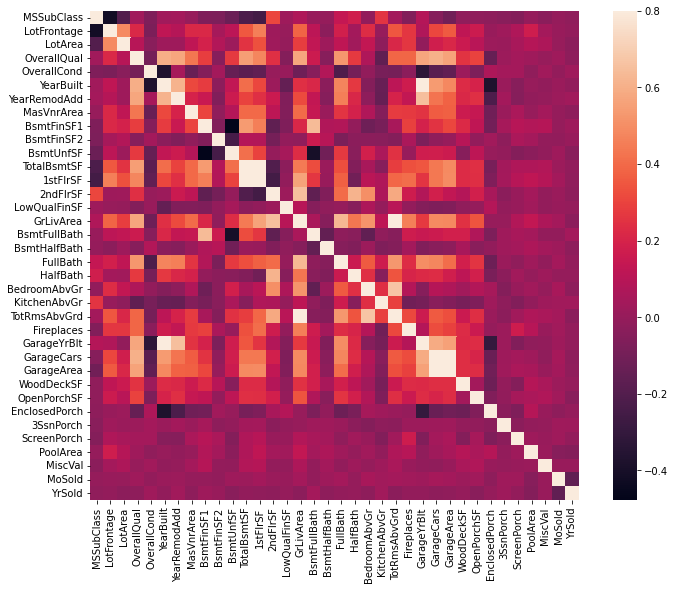

In [97]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#####Also the Garage variables we earlier discovered are also highly correlated, confirming that they may be providing the same level of information

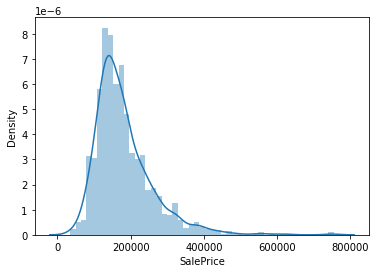

In [98]:
sns.distplot(y_train)

#####The distribution is skewed to the left

##Assumptions and whether the data is representative.

#####The data is representative for the problem according to the data population. However, we may have to make some assumptions:
#####The data is quite old. The latest year a house was sold in is 2010. It is now 2022. Many things have changed since then, most notably, the value of the dollar. Adjusting for inflation will be necessary.
#####Some of the zones the houses are listed in are agricultural, commercial, and industrial. I personally am not sure if houses are usually built in such areas especially industrial areas, but for the sake of this problem we will assume that houses are also built in these places.

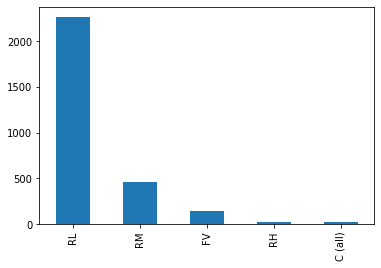

In [99]:
df_train['MSZoning'].value_counts().plot(kind='bar')

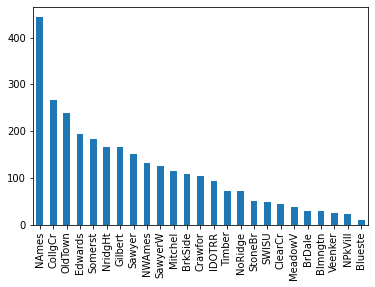

In [100]:
df_train['Neighborhood'].value_counts().plot(kind='bar')

#####I guess that cluster sampling may have been used. Data may have been divided into clusters like : residential, industrial, outer areas etc. 
#####Addressing the comment from Stage1 : It might be stratified sampling. Observations are split by neighborhood and then a different sampling method is used to sample from each stratum.  

#Stage 2

#####Picking up from where we last left off. In a prediction, we want to eliminate the most useless data as it will consume unnecessary resources. We also need clean data i.e. no missing or illogical values.
#####In that respect, we can proceed by dropping variables like PoolQC and Alley. Additionally, the Garage variables all contribute the same information. The same applies to the Bsmt variables. MasVnrArea and MasVnrType as well, also they are quite correlated with OverallQual and YearBuilt variables.

In [101]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 5]).index,1)

#####What are the features you choose to use for modeling? Why? Note: You may use EDA to show the reason. 
#####Ans : Based on the work I've shown earlier, the remaining features we have will be used in prediction, for the same reasons as stated above.

In [102]:
missing_data = df_train.isnull().sum().sort_values(ascending=False)
missing_data.head(20)

MSZoning        4
Functional      2
BsmtFullBath    2
BsmtHalfBath    2
Utilities       2
BsmtFinSF2      1
Exterior2nd     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
BsmtUnfSF       1
Exterior1st     1
TotalBsmtSF     1
Electrical      1
SaleType        1
KitchenQual     1
HalfBath        0
FullBath        0
BedroomAbvGr    0
KitchenAbvGr    0
dtype: int64

In [103]:
#we can impute data so starting with numerics 
numerics = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars']

#####So what I notice here is that the missing values are conveying some message. Looking at the basement-related variables, if they're all null then perhaps there isn't a basement? If GarageArea is null then GarageCars must also be null right? So imputing with 0 makes sense.

In [104]:
for feature in numerics:
    df_train[feature] = df_train[feature].fillna(0)

In [105]:
#for categorical features I'm just going to impute them with the most frequent value i.e. mode
categorical = ['Exterior1st',
                  'Exterior2nd',
                  'SaleType',
                  'MSZoning',
                   'Electrical',
                     'KitchenQual',
              'Functional']
for feature in categorical:
    df_train[feature] = df_train[feature].fillna(df_train[feature].mode()[0])              

In [106]:
df_train.drop(['Utilities'], axis=1, inplace=True)

In [107]:
#Just double-checking if we have any missing values before we proceed with any transformations or scaling
df_train.isnull().sum().max()

0

##Data transformations
#####Normally, we'd like for our target variable to have a normal distribution (see what I did there? Haha! :D). Jokes aside, this is important since most statistic tests like the t-test' foundation is on data having a normal distribution.

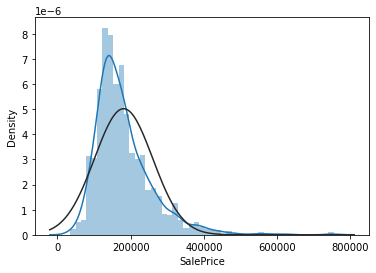

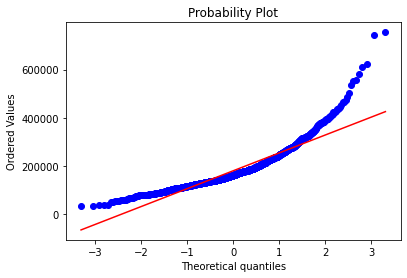

In [108]:
sns.distplot(y_train, fit=norm);
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)

#####The data doesn't follow the diagonal line in the probability plot. That line represents the normal distribution. Ideally, we'd like for our data to fit this near perfectly. Looking back at our lectures, I recall the log transformation trick we were taught! Let's give that a shot.

In [109]:
y_train = np.log1p(y_train)

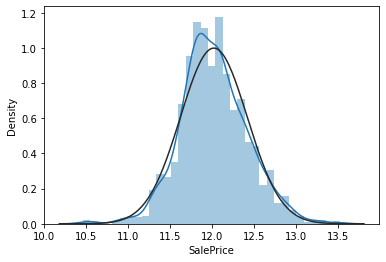

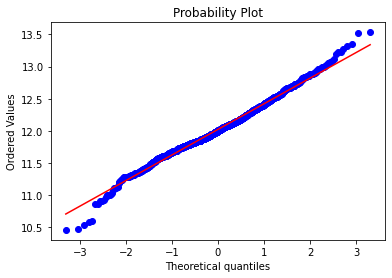

In [110]:
sns.distplot(y_train, fit=norm);
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)

#####Wizardry indeed. Might as well see if other variables suffer from the same problem!

In [111]:
from scipy.stats import skew
numeric_feats = df_train.dtypes[df_train.dtypes != 'object'].index
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
high_skew

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
YearBuilt        -0.599806
dtype: float64

In [112]:
for feature in high_skew.index:
  df_train[feature] = np.log1p(df_train[feature])

##Readiness of the data
#####Well we have a variety of variables, both continuous and categorical. We can't have both kinds. So I elect to convert the categorical variables into binary values by using one-hot encoding. A quick way to do that without the library function is to use Pandas' API's get_dummies function.
#####Also, among the continuous variables, the ranges can vary wildly. Variables with higher values will directly play a bigger part in prediction, which is not what we want. Raw value doesn't determine a prediction. Other things like correlation matter. So it's ideal to scale all these continuous variables to fit the same range.

In [113]:
df_train = pd.get_dummies(df_train) #one-hot encoding for categorical variables

In [114]:
x_train = df_train[:len(y_train)]
x_test = df_train[len(y_train):]

In [115]:
x_test.shape, x_train.shape

((1459, 218), (1460, 218))

##Modeling

#####Choosing a model and why
#####Our target variable is a continuous one. In that regard, a regression model would be in order. For the sake of simplicity right now, I am going to pick scikit-learn's library linear regression model

####How the chosen features are involved? 
####We are going to perform linear regression with multiple variables. So our target variable SalePrice is going to be the result of a linear combination of the features plus a bias term (intercept c)

#####The loss function that is going to be used is the negative mean squared error.
#####For parameter estimation we could just go ahead by loading the linear regression model from scikit-learn and just call its fit() function. 

In [116]:
#choosing cross validation to get a better picture of the model's performance
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=5) #cv being used is stratified 5-fold cross validation

In [117]:
scores

array([-0.01293566, -0.02032788, -0.02106525, -0.01355797, -0.02481811])

In [118]:
sum(scores)/5

-0.018540974588961034

#####The average error across the 5 folds is looking good. Now we can train the model on the entire train data

In [119]:
model.fit(x_train, y_train)

LinearRegression()

In [120]:
#and now prediction!
predictions = np.floor(np.expm1(model.predict(x_test))) #expm1 will calculate the exponential of all elements subtracting 1 from all the input elements, and floor will round off the value

In [121]:
submission = pd.DataFrame()
submission['Id'] = test_id
submission['SalePrice'] = predictions
submission.to_csv('lin_reg_vanilla.csv', index=False)

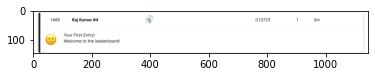

In [122]:
import matplotlib.image as mpimg
img = mpimg.imread('first_submission.png')
plt.imshow(img)

#Inference

#####Now let's compare the performance of our model with that of a more complex model like XGBRegressor. 5-fold cross validation comparing the negative mean squared error averaged over 5 folds. Only the training data used earlier for cross validation for the linear regression model will be used here.

In [123]:
import xgboost
xgbr = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators = 10)
scores_xgb = cross_val_score(xgbr, x_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [124]:
scores_xgb

array([-16.37906055, -16.30336103, -16.40902711, -16.02266185,
       -16.35181863])

In [125]:
sum(scores)/5, sum(scores_xgb)/5

(-0.018540974588961034, -16.293185834862285)

#####Appears that XGBoost is overfitting to the data. More the estimators in an ensemble model like XGBoost, more complex it gets, and the more likely it is to overfit. Let's try not doing anything with the estimator number

In [126]:
xgbr = xgboost.XGBRegressor(objective='reg:squarederror')
scores_xgb = cross_val_score(xgbr, x_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [127]:
scores_xgb

array([-0.01390989, -0.02101956, -0.01773718, -0.01621247, -0.01760149])

In [128]:
sum(scores)/5, sum(scores_xgb)/5

(-0.018540974588961034, -0.01729611753362447)

#####Based off of just the values above, we can see that XGBRegressor has marginally less squared error. It's an improvement nonetheless but I don't think this particular task requires a complex model. Most likely to consume unnecessary resources and even overfit

In [129]:
#attempting another submission
xgbr.fit(x_train, y_train)
predictions = np.floor(np.expm1(xgbr.predict(x_test)))
submission = pd.DataFrame()
submission['Id'] = test_id
submission['SalePrice'] = predictions
submission.to_csv('xgbr_vanilla.csv', index=False)

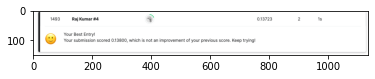

In [130]:
import matplotlib.image as mpimg
img = mpimg.imread('second_submission.png')
plt.imshow(img)

#####Looks like it didn't do better. My guess is that it overfit. Perhaps with hyperparameter tuning it can be improved.

#Conclusions and Learnings

#####From what I've done so far, most of the EDA explained the relationship between the target and the numerous features. Overall quality of a house and total living space (no-brainer) is a major factor in driving the price of a house. Dataset was relatively easy to clean, and there were clear relationships between features that could be understood just by analyzing the missing values and distributions.

#####What I learned from this project is that not every problem requires a complex model to efficiently predict. And garbage in is garbage out. Loading a model and calling the fit() function is just the tip of the iceberg. Wrangling the data, making it ready for prediction, not to mention also formatting the output data is where the challenges lie. 